<h1 style="text-align:center">Deep Learning  Lab Session </h1>
<h1 style="text-align:center">First Lab Session - 3 Hours </h1>
<h1 style="text-align:center">Artificial Neural Networks for Handwritten Digits Recognition</h1>

<b> Student 1: Gourrat Agathe</b> # name of student 1  
<b> Student 2: Salhi Laila</b> # name of student 2  
<b> Group name: deeplearn0 </b> # name of your group (i.e. deeplearnXX)
 
 
The aim of this session is to practice with Artificial Neural Networks. Answers and experiments should be made by groups of two students. Each group should fill and run appropriate notebook cells. 

To generate your final report and upload it on the submission website http://bigfoot-m1.eurecom.fr/teachingsub/login (using your deeplearnXX/password). Do not forget to run all your cells before generating your final report and do not forget to include the names of all participants in the group. The lab session should be completed ans submitted by April 13th 2018 (23:59:59 CET). 

# Introduction

During this lab session, you will implement, train and test a Neural Network
for the Handwritten Digits Recognition problem <a href="http://yann.lecun.com/exdb/mnist/"> [1] </a> with  different settings of hyperparameters. You will use the MNIST dataset which was constructed from scanned documents available from the National Institute of Standards and Technology (NIST). Images of digits were taken from a variety of scanned documents, normalized in size and centered. 


<img src="Nimages/mnist.png",width="350" height="500" align="center">
<center><span>Figure 1: MNIST digits examples</span></center>


This assignment includes a written part of programms to help you understand how to build and train
your neural net and then to test your code and get results. 

1. <a href="NeuralNetwork.py"> NeuralNetwork.py </a> 
2. <a href="transfer_functions.py"> transfer_functions.py </a> 
3.  <a href="utils.py "> utils.py </a> 


Functions defined inside the python files mentionned above can be imported  using the python command "from filename import function".

You will use the following libraries:

1. <a href="http://cs231n.github.io/python-numpy-tutorial/"> numpy </a>: for creating arrays and using methods to manipulate arrays;

2. <a href="http://matplotlib.org/"> matplotlib  </a>: for making plots.

Before starting the lab, please launch the cell below. After that, you may not need to do any imports during the lab.

In [1]:
# All imports
from NeuralNetwork import NeuralNetwork
from transfer_functions import *
from utils import *
import numpy as np
import matplotlib
import time, random

# Section 1 :  Your First Neural Network

<b>Part 1</b>: Before designing and writing your code, you will first work on a neural network by hand. 
Consider the following neural network with two inputs $x=(x_1,x_2)$, one hidden layer and a single output unit $y$.
The initial weights are set to random values. Neurons 6 and 7 represent biases. Bias values are equal to 1. You will consider a training sample whose feature vector is $x = (0.8, 0.2)$ and whose label is $y = 0.4$.

Assume that neurons have a sigmoid activation function  $f(x)=\frac{1}{(1+e^{-x})}$. The loss function $L$ is a Mean Squared Error (MSE): if $o$ denotes the output of the neural network, then the loss for a given sample $(o, y)$ is $L(o, y) = \left|\left| o - y \right|\right|^2$. In the following, you will assume that if you want to backpropagate the error on a whole batch, you will backpropagate the average error on that batch. More formally, let $((x^{(1)}, y^{(1)}), ..., (x^{(N)}, y^{(N)}))$ be a batch and $o^{(k)}$ the output associated to $x^{(k)}$. Then the total error $\bar{L}$ will be as follows:

<div align="center">$\bar{L} = \frac{1}{N} \sum_{k=1}^{N} L(o^{(k)}, y^{(k)})$.</div>




<img src="Nimages/NN.png", width="700" height="900"> 
<center><span>Figure 2: Neural network </span></center>


<b>Question 1.1.1</b>: Compute the new values of weights $w_{i,j}$ after a forward pass and a backward pass, and the outputs of the neural network before and after the backward path, when the learning rate is $\lambda$=5.
$w_{i,j}$ is the weight of the connexion between neuron $i$ and neuron $j$. Please detail your computations in the cell below and print your answers.

In [2]:
## Initialisation of the variables
lr = 5.0 # Learning rate
x1, x2, x6, x7 = 0.8, 0.2, 1.0, 1.0 
w13, w14, w23, w24, w63, w64 = 0.3, -0.5, 0.8, 0.2, 0.2, -0.4 # Weights of the neurons from the input layer and the hidden layer
w35, w45, w75 = -0.6, 0.4, 0.5 # Weights of the neurons from the hidden layer and the output layer
y = 0.4

# Computation of the activation functions in the hidden layer
u3 = x1*w13+x2*w23+x6*w63
u4 = x1*w14+x2*w24+x6*w64


x3 = sigmoid(u3)
x4 = sigmoid(u4)

u5 = x3*w35+x4*w45+x7*w75
x5 = sigmoid(u5)


print("=== FORWARD PASS 1 ===")
print("Output =", x5)

def derivHiddenWeight(y, t, u_i, w, previousOut, actualOut):
    return derivOutputWeight(y, t, u_i, actualOut) * w * (1-actualOut) * previousOut

def derivOutputWeight(y, t, u_i, o_j):
    return 2 * (y-t) * dsigmoid(u_i) * o_j

d_w35 = derivOutputWeight(x5, y, u5, x3)
d_w45 = derivOutputWeight(x5, y, u5, x4)
d_w75 = derivOutputWeight(x5, y, u5, x7)

d_w13 = derivHiddenWeight(x5, y, u5, w35, x1, x3)
d_w14 = derivHiddenWeight(x5, y, u5, w45, x1, x4)
d_w23 = derivHiddenWeight(x5, y, u5, w35, x2, x3)
d_w24 = derivHiddenWeight(x5, y, u5, w45, x2, x4)
d_w63 = derivHiddenWeight(x5, y, u5, w35, x6, x3)
d_w64 = derivHiddenWeight(x5, y, u5, w45, x6, x4)

w13 -= lr*d_w13
w14 -= lr*d_w14
w23 -= lr*d_w23
w24 -= lr*d_w24
w63 -= lr*d_w63
w64 -= lr*d_w64
w35 -= lr*d_w35
w45 -= lr*d_w45
w75 -= lr*d_w75

print("=== BACKWARD PASS ===")
print("w13 =", w13)
print("w14 =", w14)
print("w23 =", w23)
print("w24 =", w24)
print("w63 =", w63)
print("w64 =", w64)
print("w35 =", w35)
print("w45 =", w45)
print("w75 =", w75)


x3 = sigmoid(x1*w13+x2*w23+x6*w63)
x4 = sigmoid(x1*w14+x2*w24+x6*w64)
x5 = sigmoid(x3*w35+x4*w45+x7*w75)

print("=== FORWARD PASS 2 ===")
print("Output =", x5)

=== FORWARD PASS 1 ===
Output = 0.5597295991095776
=== BACKWARD PASS ===
w13 = 0.3432265432215471
w14 = -0.5273473101875394
w23 = 0.8108066358053868
w24 = 0.19316317245311515
w63 = 0.2540331790269339
w64 = -0.4341841377344243
w35 = -0.8541467506279605
w45 = 0.2745727217772572
w75 = 0.10637455535192786
=== FORWARD PASS 2 ===
Output = 0.40648823589210104


<div class="alert alert-success">

COMMENT : <br />
We start the manual training with the input [0.8, 0.2] and processed two feedforwards, the second after a training of the model. The output evolved from 0.56 (after the first feedforward) to 0.48 (after a backpropagation and another feedforward) which is closer to 0.4, the wanted value.

</div>

<b>Part 2</b>: Neural Network Implementation

Please read all source files carefully and understand the data structures and all functions.
You are to complete the missing code. 
First you should define the neural network (using the NeuralNetwork class, see in the <a href="NeuralNetwork.py"> NeuralNetwork.py</a> file) and reinitialise weights. 
Then you will need to complete the feedforward() and the backpropagate() functions. 

<b>Question 1.2.1</b>: Implement the feedforward() function.

In [3]:
class NeuralNetwork(NeuralNetwork):
    def feedforward(self, inputs):
        self.o_input = inputs
        
        # Append the bias to the input vector
        if len(inputs[0]) < self.input_layer_size:
            self.o_input = np.append(self.o_input, np.ones((len(inputs), 1)), axis=1)
        
        # Compute output for the first hidden layer
        self.u_hidden = np.dot(self.o_input, self.W_input_to_hidden)
        self.o_hidden = self.transfer_f(self.u_hidden)
        
        # Append the bias again
        if len(self.o_hidden[0]) < self.hidden_layer_size:
            self.o_hidden = np.append(self.o_hidden, np.ones((len(self.o_hidden), 1)), axis=1)
        
        # Compute network output
        self.u_output = np.dot(self.o_hidden, self.W_hidden_to_output)
        self.o_output = self.transfer_f(self.u_output)
                                

<div class="alert alert-success">

COMMENT :
During the feedforward process, we have to be careful to add the bias before doing any computation for the input and the hidden layer.

</div>

<b>Question 1.2.2</b>: Test your implementation: create the Neural Network defined in Part 1 and see if the feedforward() function you implemented gives the same results as the ones you found by hand.

In [4]:
# First define your neural network
model = NeuralNetwork(input_layer_size=2, 
                      hidden_layer_size=2, 
                      output_layer_size=1, 
                      transfer_f=sigmoid, 
                      transfer_df=dsigmoid)

# Then initialize the weights according to Figure 2
W_input_to_hidden = np.array([[.3,-.5],[.8,.2],[.2,-.4]])
W_hidden_to_output = np.array([[-.6],[.4],[.5]])
model.weights_init(W_input_to_hidden, W_hidden_to_output)

# Feed test values
test = [[0.8, 0.2]]
model.feedforward(test)

# Print the output
print("Output =", model.o_output[0,0])

Output = 0.5597295991095776


<div class="alert alert-success">
COMMENT : <br />
The output matches with the result we got at the question 1.1.1, with the manual computation. It validates the function.
</div>

<b>Question 1.2.3</b>: Implement the backpropagate() function.

In [5]:
class NeuralNetwork(NeuralNetwork):
    def backpropagate(self, targets, learning_rate=5.0):
        # Compute the error derivatives w.r.t. the activation for the output 
        self.dE_du_output = np.multiply(self.o_output - targets, self.transfer_df(self.u_output))
        
        # Compute the error derivatives w.r.t. the activation for the hidden layers
        # We have to append the bias and then delete the axis corresponding to the bias computation 
        self.dE_du_hidden = np.multiply(self.dE_du_output.dot(self.W_hidden_to_output.T), 
                                       np.append(self.transfer_df(self.u_hidden), 
                                                 np.ones((len(self.transfer_df(self.u_hidden)), 1)), axis=1))[:, :-1]

        # Compute the error derivatives w.r.t. the weights 
        # We have to normalize in order to visualize the accuracy later
        self.dE_dw_hidden =  (2 / len(targets)) * np.dot(self.dE_du_hidden.T, self.o_input).T
        self.dE_dw_output =  (2 / len(targets)) * np.dot(self.dE_du_output.T, self.o_hidden).T
        
        # Update weights
        self.W_hidden_to_output -= learning_rate * self.dE_dw_output
        self.W_input_to_hidden -= learning_rate * self.dE_dw_hidden

<div class="alert alert-success">
COMMENT : <br />
During the backpropagate process, we also have to be careful to add the bias before computating dE_du of the hidden layer and we need to remove it after because of dimension issues.
</div>

<b>Question 1.2.4</b>: Test your implementation: create the Neural Network defined in Part 1 and see if the backpropagate() function you implemented gives the same weight updates as the ones you found by hand. Do another forward pass and see if the new output is the same as the one you obtained in Question 1.1.1.

In [6]:
# First define your neural network
model = NeuralNetwork(input_layer_size=2, 
                      hidden_layer_size=2, 
                      output_layer_size=1, 
                      transfer_f=sigmoid, 
                      transfer_df=dsigmoid)

# Then initialize the weights according to Figure 2
W_input_to_hidden = np.array([[.3,-.5],[.8,.2],[.2,-.4]])
W_hidden_to_output = np.array([[-.6],[.4],[.5]])

model.weights_init(W_input_to_hidden, W_hidden_to_output)

# Feed test values
test = [[0.8, 0.2]]
model.feedforward(test)

# Backpropagate
targets = [[0.4]]
model.backpropagate(targets)

# Print weights
#print("W_input_to_hidden =", model.W_input_to_hidden)
#print("W_hidden_to_output =", model.W_hidden_to_output)

print("w13 =", model.W_input_to_hidden[0][0])
print("w14 =", model.W_input_to_hidden[0][1])
print("w23 =", model.W_input_to_hidden[1][0])
print("w24 =", model.W_input_to_hidden[1][1])
print("w63 =", model.W_input_to_hidden[2][0])
print("w64 =", model.W_input_to_hidden[2][1])
print("w35 =", model.W_hidden_to_output[0][0])
print("w45 =", model.W_hidden_to_output[1][0])
print("w75 =", model.W_hidden_to_output[2][0])


# Feed test values again
model.feedforward(test)

# Print the output
print("Output =", model.o_output[0][0])

w13 = 0.3432265432215471
w14 = -0.5273473101875394
w23 = 0.8108066358053868
w24 = 0.19316317245311515
w63 = 0.2540331790269339
w64 = -0.4341841377344243
w35 = -0.8541467506279605
w45 = 0.2745727217772572
w75 = 0.10637455535192786
Output = 0.40648823589210104


<div class="alert alert-success">

COMMENT : <br />
It matches again with the result we got with the manual computation, after one training. It validates the backpropagate function.
</div>

Checked your implementations and found that everything was fine? Congratulations! You can move to the next section.

# Section 2: Handwritten Digits Recognition

The MNIST dataset consists of handwritten digit images. It is split into a training set containing 60,000 samples and a test set containing 10,000 samples. In this Lab Session, the official training set of 60,000 images is divided into an actual training set of 50,000 samples a validation set of 10,000 samples. All digit images have been size-normalized and centered in a fixed size image of 28 x 28 pixels. Images are stored in byte form: you will use the NumPy python library to convert data files into NumPy arrays that you will use to train your Neural Networks.

You will first work with a small subset of MNIST (1000 samples), then on a very small subset of MNIST (10 samples), and eventually run a model on the whole one.

The MNIST dataset is available in the Data folder.
To get the training, testing and validation data, run the load_data() function.


In [7]:
# Just run that cell ;-)
training_data, validation_data, test_data = load_data()
small_training_data = (training_data[0][:1000], training_data[1][:1000])

small_validation_data = (validation_data[0][:200], validation_data[1][:200])

indices = [1, 3, 5, 7, 2, 0, 13, 15, 17, 4]
vsmall_training_data = ([training_data[0][i] for i in indices], [training_data[1][i] for i in indices])

Loading MNIST data .....
Done.


In [8]:
print("length data : ", len(small_training_data))
print("length data[0] : ", len(small_training_data[0][0]))
print("inputs :", len(small_training_data[1][0]))
print("test_data :", len(test_data[1][1]))

length data :  2
length data[0] :  784
inputs : 10
test_data : 10


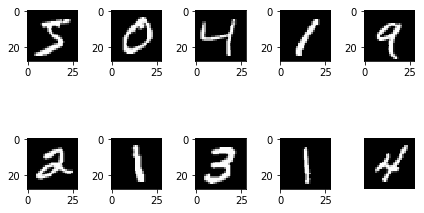

In [9]:
# And you can run that cell if you want to see what the MNIST dataset looks like
ROW = 2
COLUMN = 5
for i in range(ROW * COLUMN):
    # train[i][0] is i-th image data with size 28x28
    image = np.array(training_data[0][i]).reshape(28, 28)   
    plt.subplot(ROW, COLUMN, i+1)          
    plt.imshow(image, cmap='gray')  # cmap='gray' is for black and white picture.
plt.axis('off')  # do not show axis value
plt.tight_layout()   # automatic padding between subplots
plt.show()

<b>Part 1</b>: Build a bigger Neural Network

The input layer of the neural network that you will build contains neurons encoding the values of the input pixels. The training data for the network will consist of many 28 by 28 pixel images of scanned handwritten digits. Thus, the input layer contains 784=28×28 units. The second layer of the network is a hidden layer. We set the number of neurons in the hidden layer to 30. The output layer contains 10 neurons.

<b>Question 2.1.1</b>: Create the network described above using the NeuralNetwork class.

In [10]:
# Define your neural network
mnist_model = NeuralNetwork(input_layer_size=784, 
                      hidden_layer_size=30, 
                      output_layer_size=10, 
                      transfer_f=sigmoid, 
                      transfer_df=dsigmoid)

<b>Question 2.1.2</b>: Train your Neural Network on the small subset of MNIST (300 iterations) and print the new accuracy on test data. You will use small_validation_data for validation. Try different learning rates (0.1, 1.0, 10.0). You should use the train() function of the NeuralNetwork class to train your network, and the weights_init() function to reinitialize weights between tests. Print the accuracy of each model on test data using the predict() function.

### Train with iteration on each image

```python

def train_on_each_image(self, data, validation_data, iterations=50, learning_rate=5.0, verbose=False):
        start_time = time.time()
        training_accuracies = []
        validation_accuracies = []
        
        
        MSE = []
        MSE_validation = []
        
        best_val_acc = 100*self.predict(validation_data)/len(validation_data[0])
        best_i2h_W = self.W_input_to_hidden
        best_h2o_W = self.W_hidden_to_output
        
        for it in range(iterations):
            # Training with data
            errors = []
            for image in range(len(data[0])):
                targets = data[1][image]
                #print(len(targets))
                self.feedforward(inputs = [data[0][image]])
                self.backpropagate(targets, learning_rate=learning_rate)
                # Computation of the training errors
                error = [targets] - self.o_output
                error *= error
                errors.append(error[0])
            training_accuracies.append(100*self.predict_on_each_image([[data[0][image]],[data[1][image]]])/len(data[0][image]))
            MSE.append(np.sum(errors)/len(data[0]))
            
            errors_validation = []
            for image in range(len(validation_data[0])):
                targets_validation = validation_data[1][image]
                error_validation = [targets_validation] - self.o_output
                error_validation *= error_validation
                errors_validation.append(error_validation[0])
            MSE_validation.append(np.sum(errors_validation)/len(validation_data[0]))
            validation_accuracies.append(100*self.predict_on_each_image([[validation_data[0][image]],[validation_data[1][image]]])/len(validation_data[0][image]))
            
            if validation_accuracies[-1] > best_val_acc:
                best_i2h_W = self.W_input_to_hidden
                best_h2o_W = self.W_hidden_to_output
            if verbose:
                print("[Iteration %2d/%2d]  -Training_Accuracy:  %2.2f %%  -Validation_Accuracy: %2.2f %%  -time: %2.2f " %(it+1, iterations,
                                                            training_accuracies[-1], validation_accuracies[-1], time.time() - start_time))
                print("    - MSE:", np.sum(error)/len(targets))
        print("Training time:", time.time()-start_time)
        plot_train_val(range(1, iterations+1), training_accuracies, validation_accuracies, "Accuracy", MSE, MSE_validation)
```

In [11]:
# Just run that cell ;-)
training_data, validation_data, test_data = load_data()
#small_training_data = (training_data[0][:1000], training_data[1][:1000])
small_training_data = (training_data[0][:200], training_data[1][:200])
#small_validation_data = (validation_data[0][:200], validation_data[1][:200])
small_validation_data = (validation_data[0][:50], validation_data[1][:50])
indices = [1, 3, 5, 7, 2, 0, 13, 15, 17, 4]
vsmall_training_data = ([training_data[0][i] for i in indices], [training_data[1][i] for i in indices])

Loading MNIST data .....
Done.


Training model with Learning Rate: 0.1
Training time: 235.23336577415466


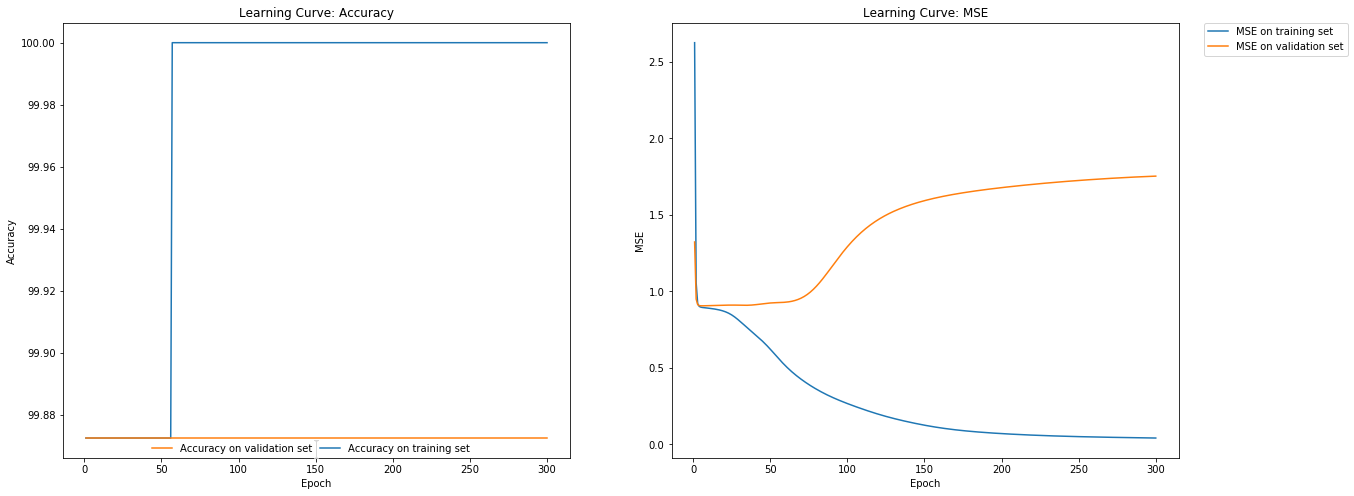

Accuracy: 78.37599000001269%

Training model with Learning Rate: 1
Training time: 232.89680361747742


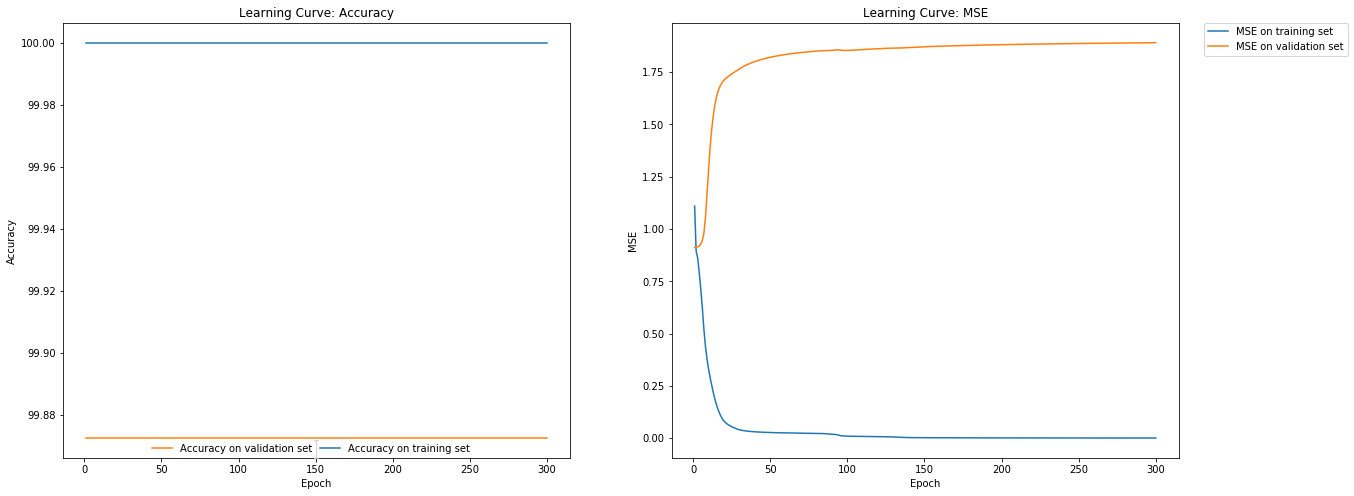

Accuracy: 78.3761000000128%

Training model with Learning Rate: 10
Training time: 231.29928135871887


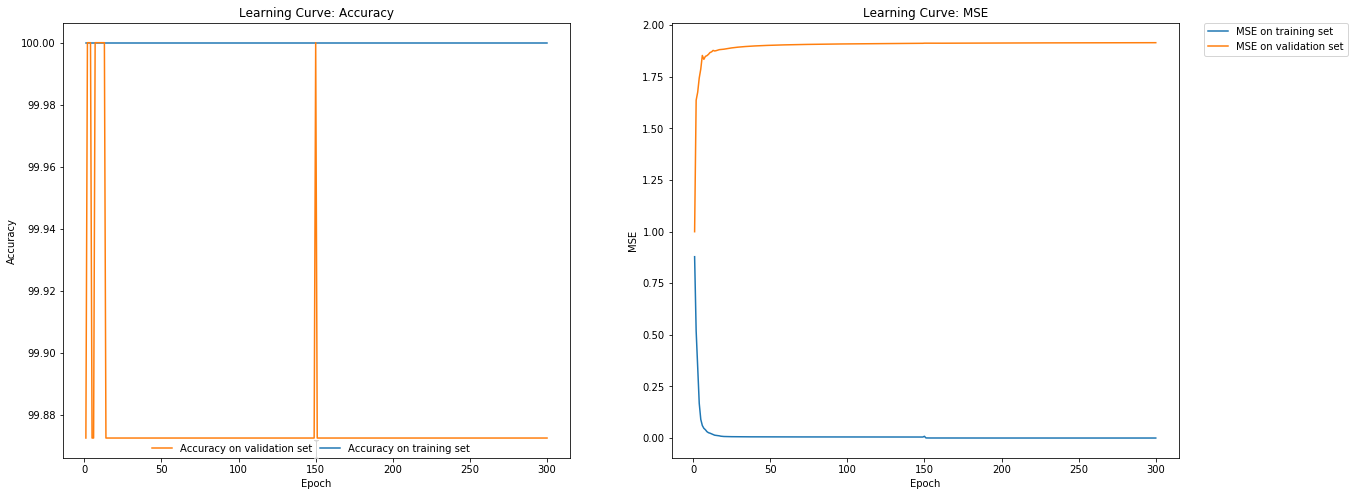

Accuracy: 78.37638000001262%



In [12]:
# Train NN and print accuracy on test data
n_iterations = 300

for lr in [0.1, 1, 10]:
    
    # Train the model with a learning rate of lr and plot the accuracies and MSE for the trainingdata and validation data
    print('Training model with Learning Rate: {}'.format(lr))
    mnist_model.train_on_each_image(small_training_data, small_validation_data, iterations=n_iterations, learning_rate =lr)
    
    # Compute accuracy
    acc = 0
    for image in range(len(test_data[0])):
        acc += mnist_model.predict_on_each_image([[test_data[0][image]],[test_data[1][image]]]) / 10 # We divide per the number of outputs
    acc = acc / len(test_data[0])
    print('Accuracy: {}%\n'.format(acc))
    
    # Reinitialize model weights
    mnist_model.weights_init()

<div class="alert alert-success">

COMMENT : <br />
At first, we decided to train on each images. But the computation time is to high tue to a training on each image. Moreovers ther's clearly overfitting: the accuracy on the training set reach really fast 100% whereas the accuracy of the validation set is lower even if it's high. But what confirms that there's overfitting is the Learning Curve of the MSE: though the MSE of the training set decrease fastly, the MSE of the validation set only increase through iterations. <br />
<br />
A way to prevent overfitting is to make sure that the number of Neurons is smaller enough than what we just used.<br />
<br />
As, training the model here takes some time, four/five minutes each time because of the number of iterations which is significant (300), we decided to continue with the original train function which trains on all image at once: it is faster and doesn't always overfit as we give way less information.

</div>

### Train on all images without iteration on each image

In [13]:
# Just run that cell ;-)
training_data, validation_data, test_data = load_data()
small_training_data = (training_data[0][:1000], training_data[1][:1000])
small_validation_data = (validation_data[0][:200], validation_data[1][:200])
indices = [1, 3, 5, 7, 2, 0, 13, 15, 17, 4]
vsmall_training_data = ([training_data[0][i] for i in indices], [training_data[1][i] for i in indices])

Loading MNIST data .....
Done.


Training model with Learning Rate: 0.1
Training time: 16.232688903808594


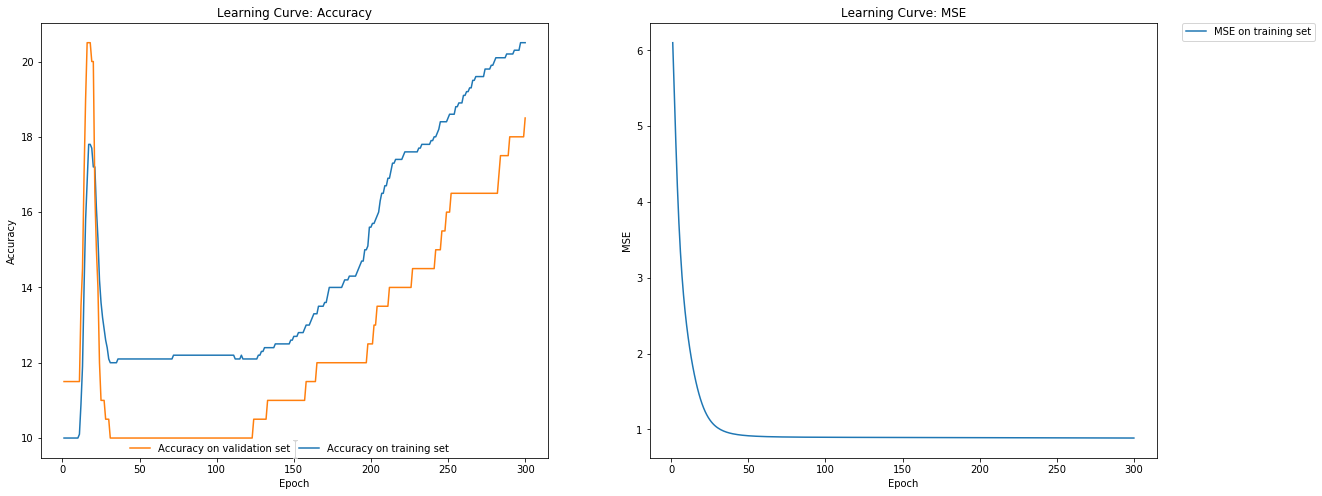

Accuracy: 19.75%
Training model with Learning Rate: 1
Training time: 16.047343254089355


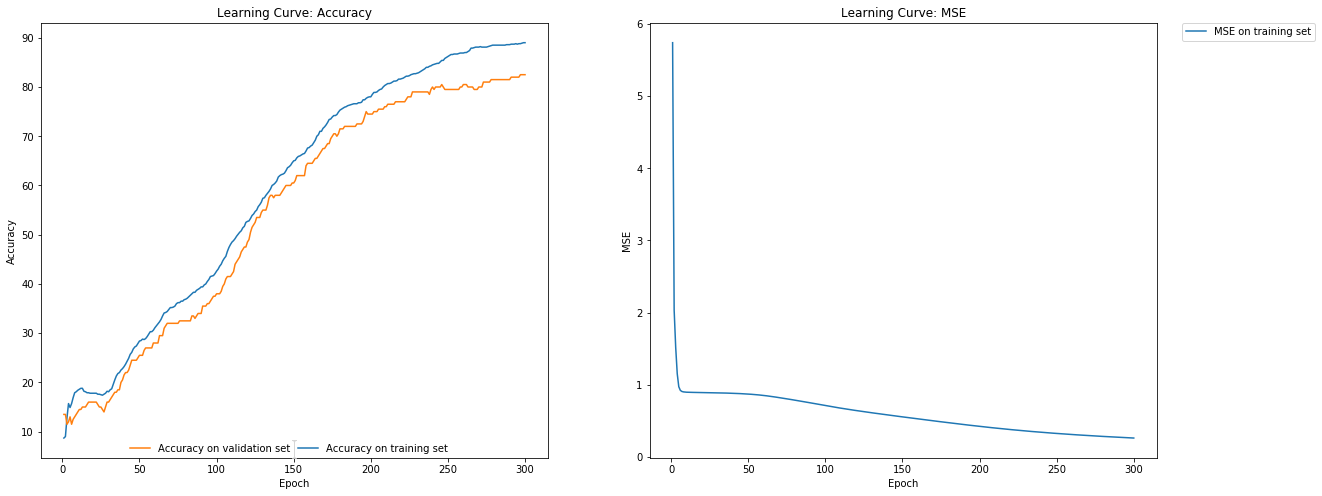

Accuracy: 83.21%
Training model with Learning Rate: 10
Training time: 15.93097972869873


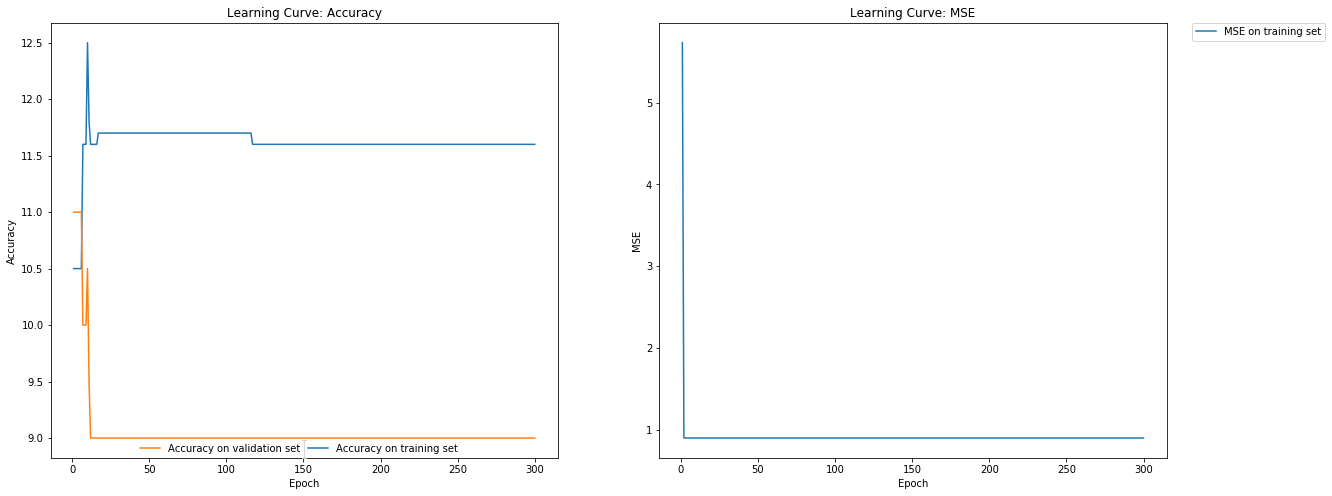

Accuracy: 10.41%


In [14]:
# Train NN and print accuracy on test data
n_iterations = 300

for lr in [0.1, 1, 10]:
    print('Training model with Learning Rate: {}'.format(lr))
    mnist_model.train(small_training_data, small_validation_data, iterations=n_iterations, learning_rate =lr)
    # Compute accuracy
    acc = mnist_model.predict(test_data) / 100
    print('Accuracy: {}%'.format(acc))
    
    # Reinitialize model weights
    mnist_model.weights_init()

<div class="alert alert-success">

COMMENT : <br />
Training the model here takes way less time, 10 to 20 seconds each time. But still it is high because of the number of iterations which is significant (300). <br />
<br />
The accuracy increases with the learning rate. The first learning rate (0.1) is too low, the model cannot train efficiently. Is has a great progression at the beginning, in the first iterations, but then reach around 19%. The second learning rate used (1) is better as we can see a steady increase in the accuracy, however it is quite slow and it needs more iterations to get a better accuracy (and thus more computation time). Otherwise, the accuracy, around 83%, is satisfactory. The last learning rate used (10) is the worst as it is the one that pernits to have the worst result with an accuracy around 10%. The accuracy of the model idecreases significantly at the beginning and then stagnates. This means that it need less iteration to get this result than with lower learning rates. Moreover there's clearly overfitting: even though the accuracy of the training set is low too, it is higher than the accuracy of the validation set.<br />
<br />
The accuracy of the training data and the validation data is different. The data with which the model has been trained gives logically a better accuracy overall. With a learning rate of 0.1, the accuracy of the validation data is higly insufficient. With a learning rate of 1, its accuracy is closed to the training data's which indicates a good model. With a learning rate of 10, the model is not really improving after 10-20 iterations and the accuracy of the validation data becomes further from the training data's accuracy.

</div>

<b>Question 2.1.3</b>: Do the same with 15 and 75 hidden neurons.

## 15 Hidden Neurons

Training model with Learning Rate: 0.1
Training time: 15.97112226486206


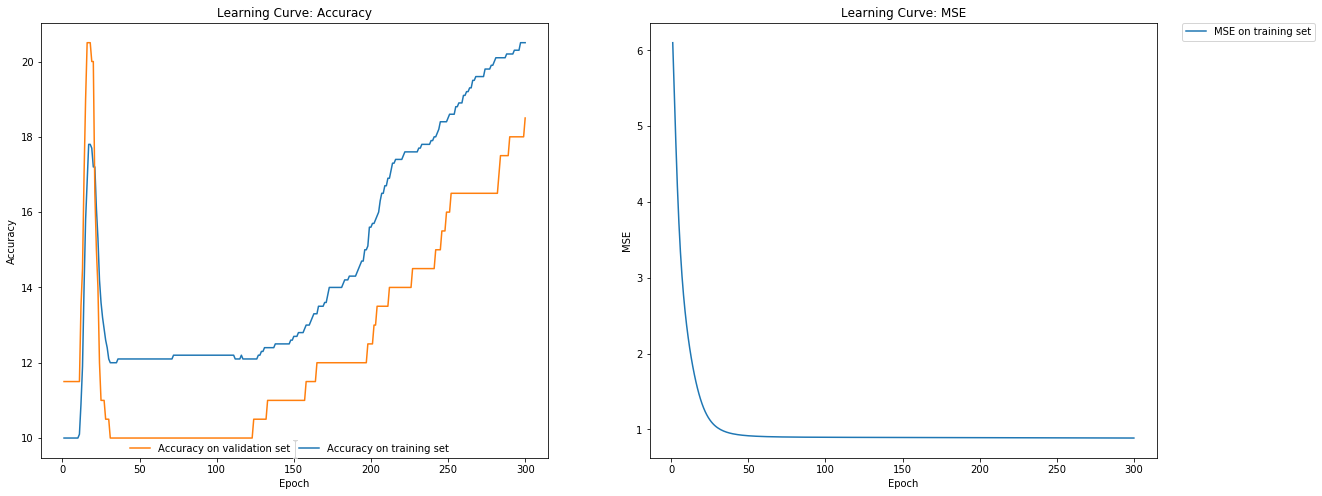

Accuracy: 19.75%
Training model with Learning Rate: 1
Training time: 15.92449688911438


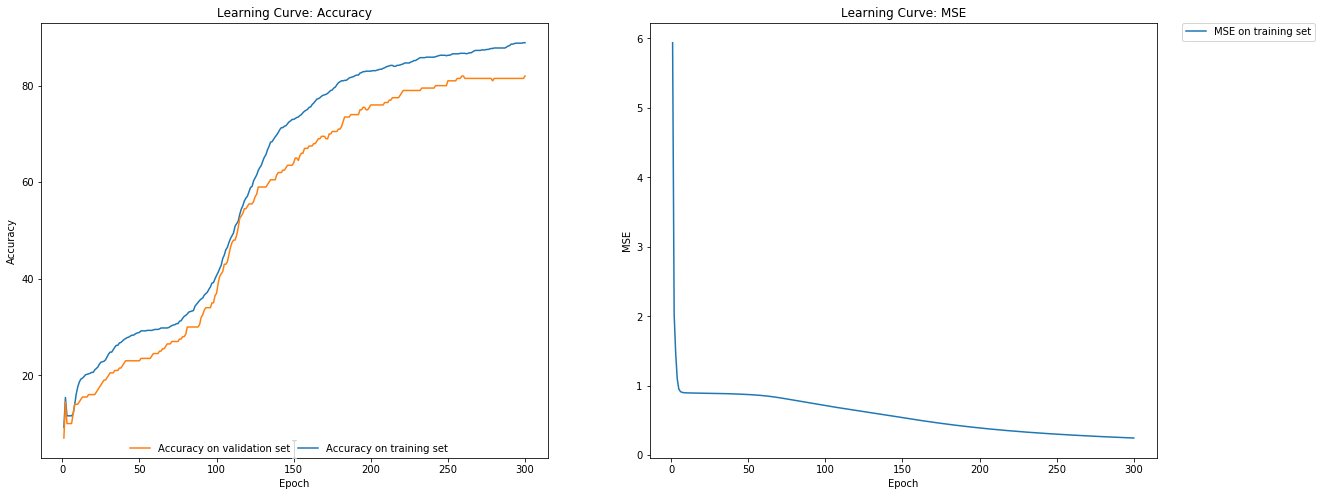

Accuracy: 83.47%
Training model with Learning Rate: 10
Training time: 15.934570789337158


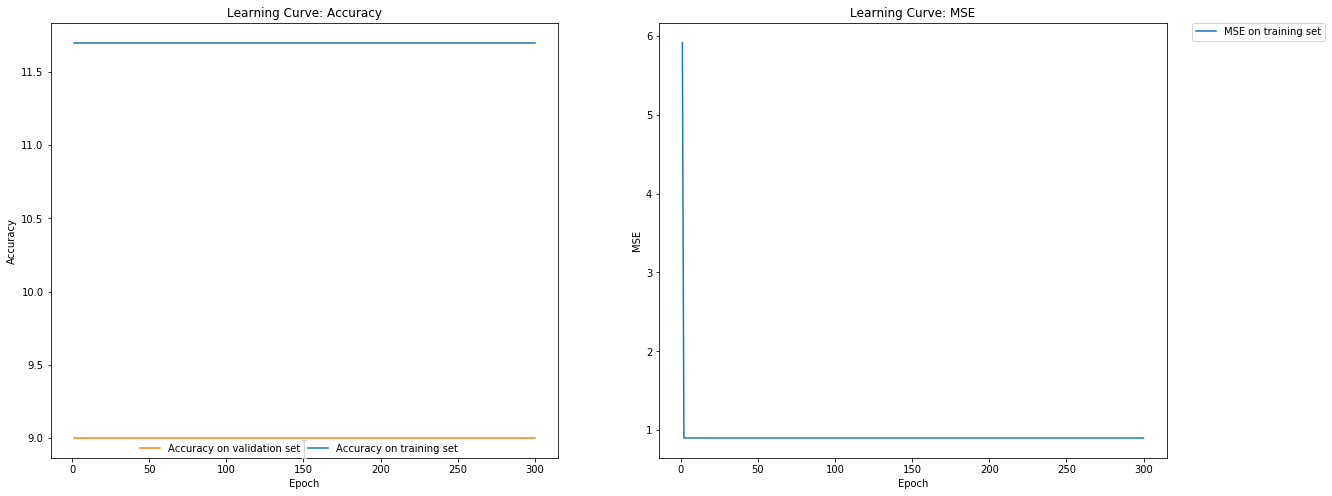

Accuracy: 10.28%


In [15]:
# Define your neural network
# 15 hidden neurons 
mnist_model_15 = NeuralNetwork(input_layer_size=784, 
                      hidden_layer_size=15, 
                      output_layer_size=10, 
                      transfer_f=sigmoid, 
                      transfer_df=dsigmoid)

# Train NN and print accuracy on test data
n_iterations = 300

for lr in [0.1, 1, 10]:
    print('Training model with Learning Rate: {}'.format(lr))
    mnist_model.train(small_training_data, small_validation_data, iterations=n_iterations, learning_rate = lr)
    # Compute accuracy
    acc = mnist_model.predict(test_data) / 100
    print('Accuracy: {}%'.format(acc))
    # Reinitialize model weights
    mnist_model.weights_init()


<div class="alert alert-success">

COMMENT : <br />
Training a network with 15 neurons in the hidden layer takes as much time as with 30 neurons in hidden layer.

The model of the network is more simple (we have decreased the number of neurons in the hidden layer) thus it has less risk to overfit.<br />
<br />
Still the results are quite the same as before.
</div>

## 75 Hidden Neurons

Training model with Learning Rate: 0.1
Training time: 15.966525554656982


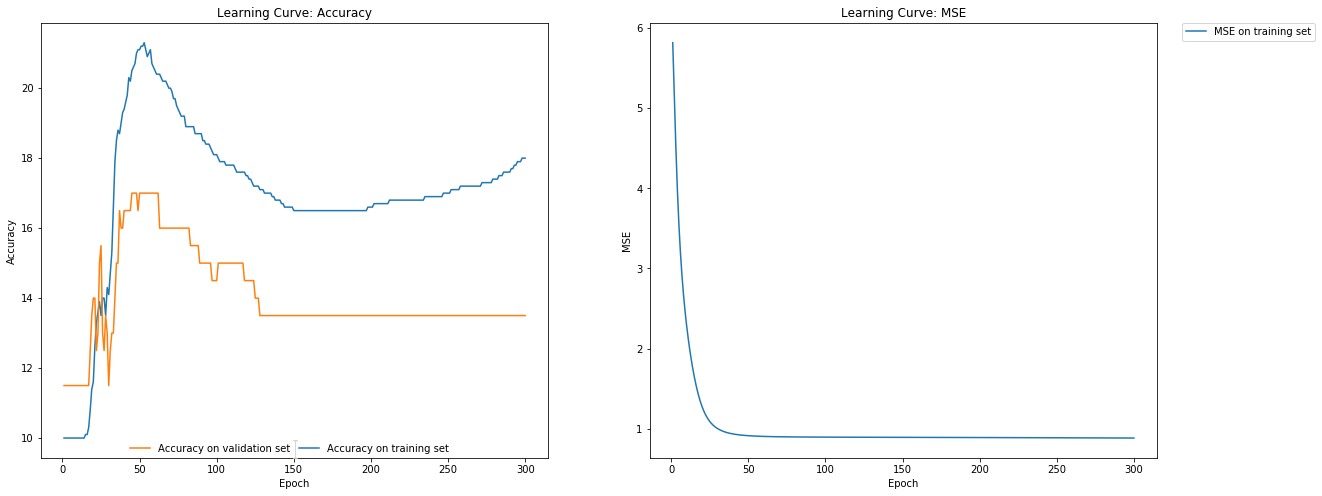

Accuracy: 16.36%
Training model with Learning Rate: 1
Training time: 15.949758052825928


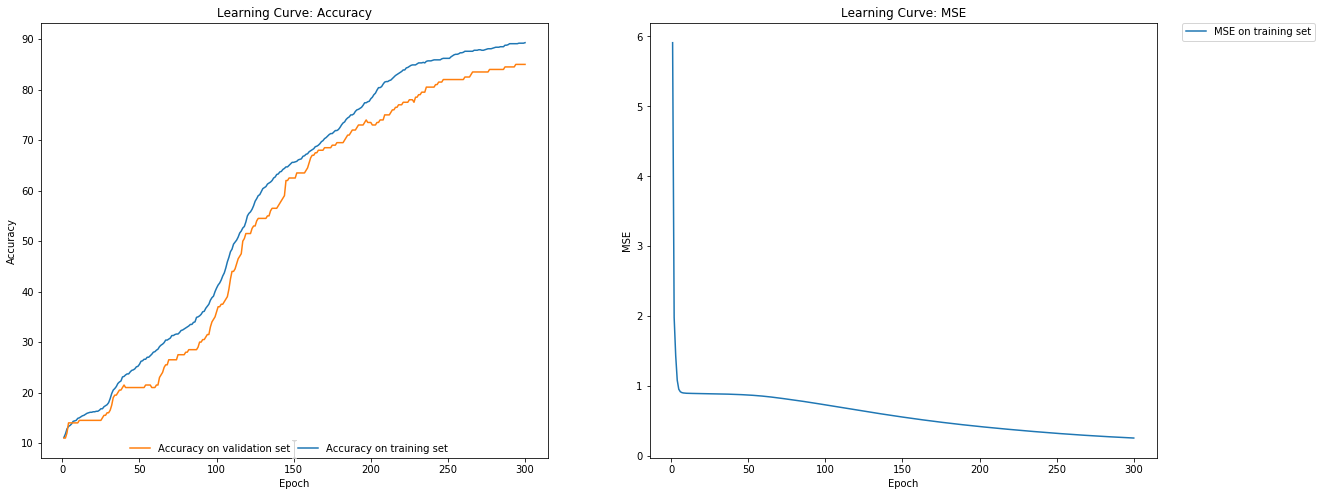

Accuracy: 83.48%
Training model with Learning Rate: 10
Training time: 15.94348669052124


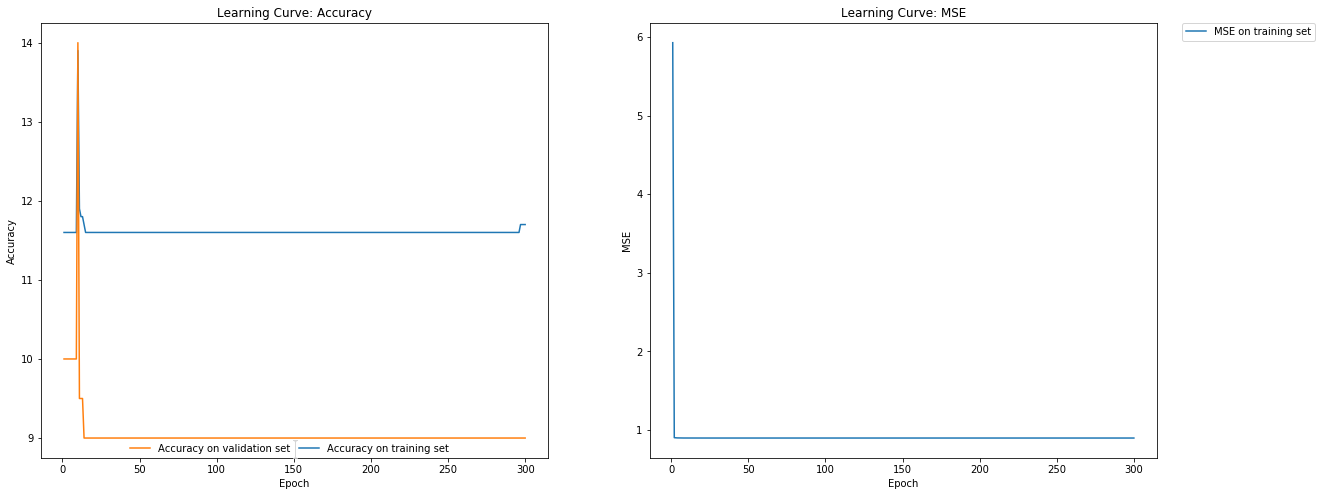

Accuracy: 10.5%


In [16]:
# 75 hidden neurons
mnist_model_75 = NeuralNetwork(input_layer_size=784, 
                      hidden_layer_size=75, 
                      output_layer_size=10, 
                      transfer_f=sigmoid, 
                      transfer_df=dsigmoid)

# Train NN and print accuracy on test data
n_iterations = 300

for lr in [0.1, 1, 10]:
    print('Training model with Learning Rate: {}'.format(lr))
    mnist_model.train(small_training_data, small_validation_data, iterations=n_iterations, learning_rate = lr)
    # Compute accuracy
    acc = mnist_model.predict(test_data) / 100
    print('Accuracy: {}%'.format(acc))
    # Reinitialize model weights
    mnist_model.weights_init()

<div class="alert alert-success">

COMMENT : <br />
Training a network with 75 hidden neurons takes more time than using 30 neurons wich is logical as it has to compute more weights.

As the network is more complex with 75 hidden neurons, the model can be more precise and have a small error for the training data. However, as it is more precise it has also more risk to overfit thus the error on the validation data can increase.


</div>

<b>Question 2.1.3</b>: Repeat Questions 2.1.2 and 2.1.3 on the very small datasets. You will use small_validation_data for validation.

## 30 Hidden Neurons

Training model with Learning Rate: 0.1
Training time: 1.4467403888702393


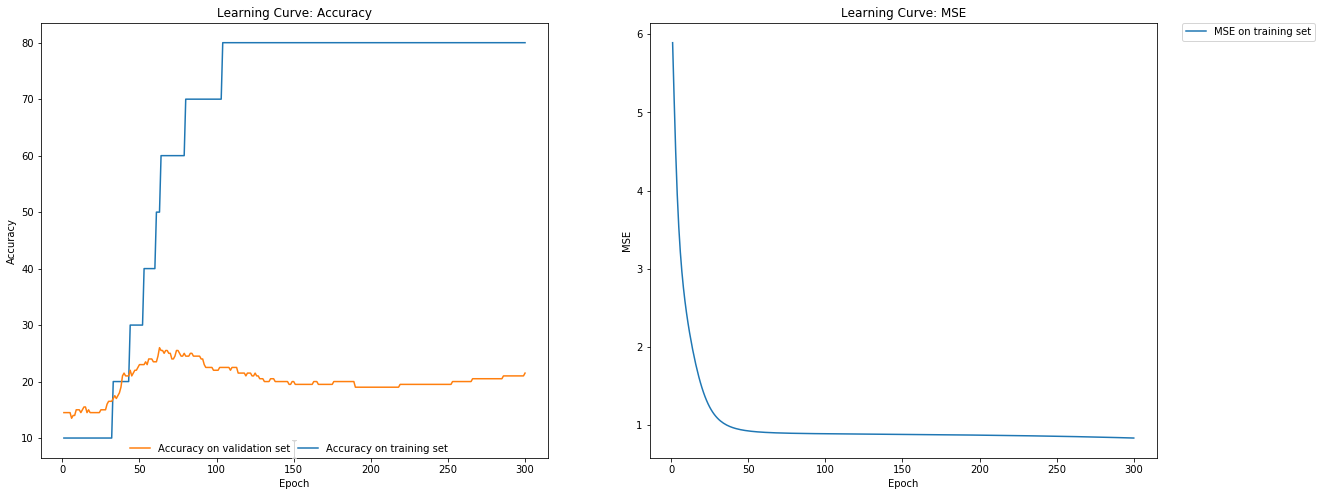

Accuracy: 20.52%
Training model with Learning Rate: 1
Training time: 1.447941541671753


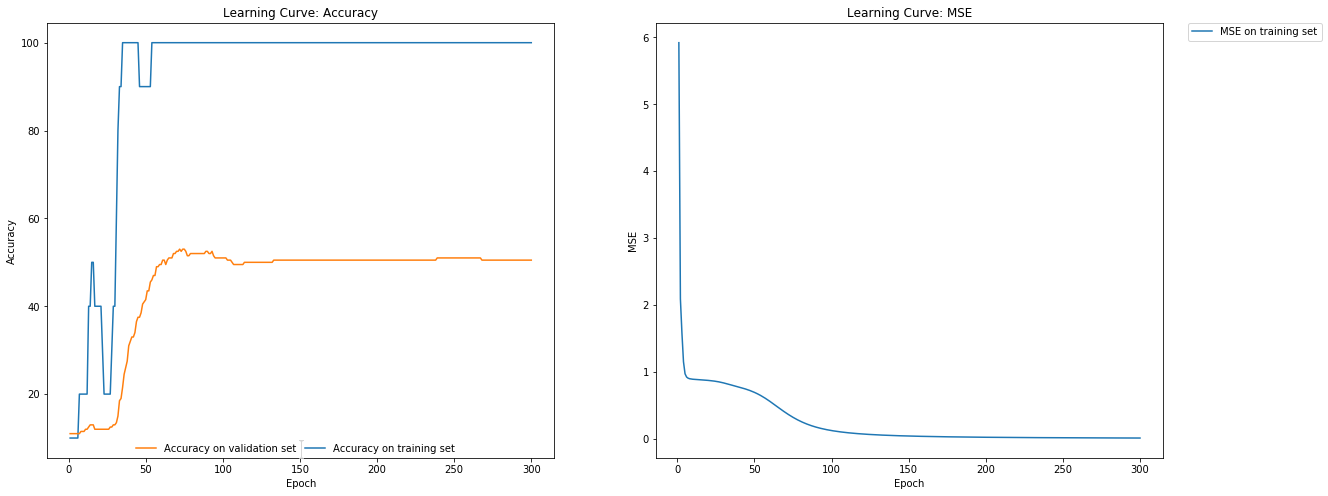

Accuracy: 50.25%
Training model with Learning Rate: 10
Training time: 1.4407565593719482


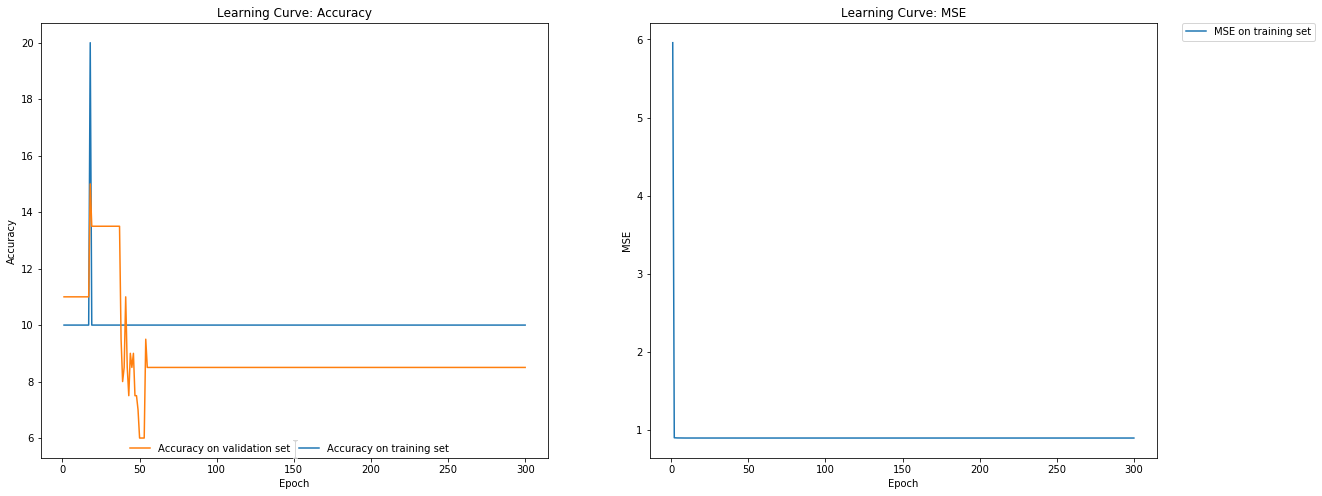

Accuracy: 9.44%


In [17]:
# Train NN and print accuracy on test data

# Define your neural network
mnist_model = NeuralNetwork(input_layer_size=784, 
                      hidden_layer_size=30, 
                      output_layer_size=10, 
                      transfer_f=sigmoid, 
                      transfer_df=dsigmoid)

# Train NN and print accuracy on test data
n_iterations = 300

for lr in [0.1, 1, 10]:
    print('Training model with Learning Rate: {}'.format(lr))
    mnist_model.train(vsmall_training_data, small_validation_data, iterations=n_iterations, learning_rate =lr)
    # Compute accuracy
    acc = mnist_model.predict(test_data) / 100
    print('Accuracy: {}%'.format(acc))
    # Reinitialize model weights
    mnist_model.weights_init()


## 15 Hidden Neurons

Training model with Learning Rate: 0.1
Training time: 1.3647651672363281


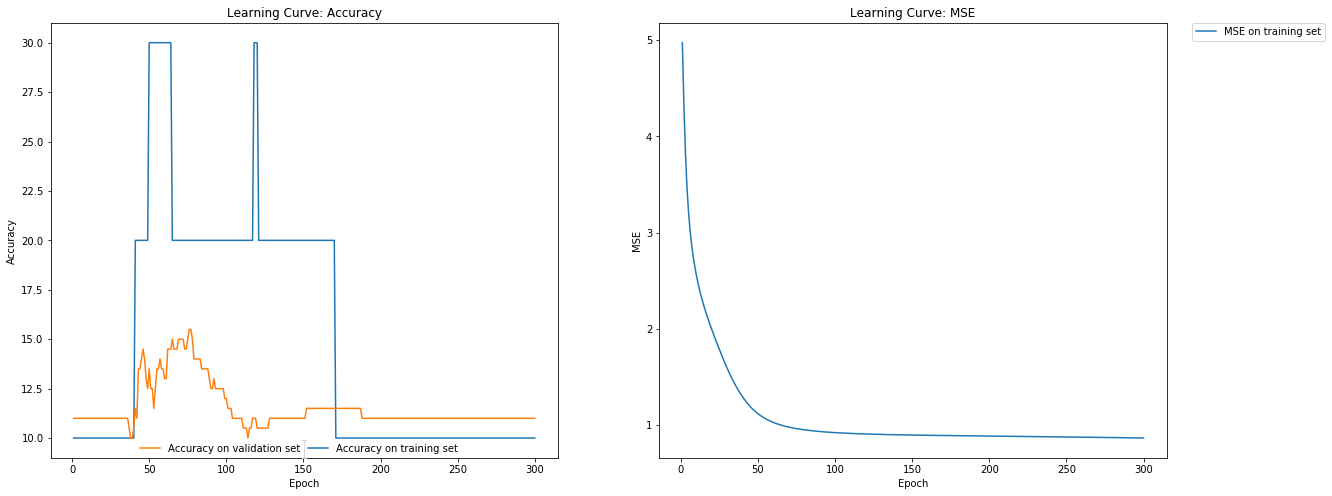

Accuracy: 9.87%
Training model with Learning Rate: 1
Training time: 1.3627450466156006


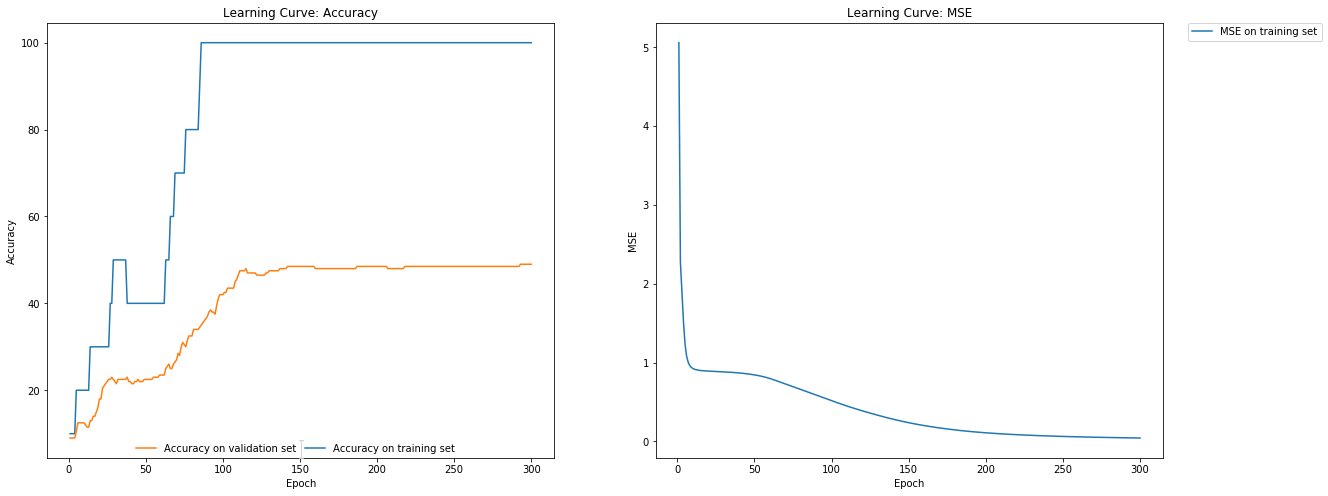

Accuracy: 48.55%
Training model with Learning Rate: 10
Training time: 1.3619556427001953


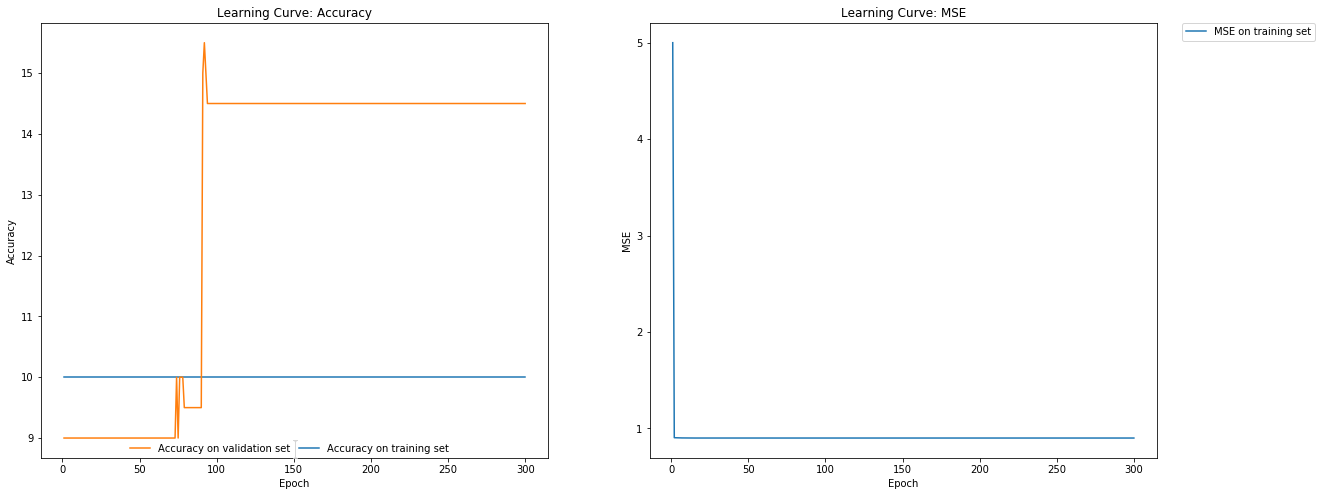

Accuracy: 11.65%


In [18]:
# 15 hidden neurons
# Define your neural network
mnist_model = NeuralNetwork(input_layer_size=784, 
                      hidden_layer_size=15, 
                      output_layer_size=10, 
                      transfer_f=sigmoid, 
                      transfer_df=dsigmoid)

# Train NN and print accuracy on test data
n_iterations = 300

for lr in [0.1, 1, 10]:
    print('Training model with Learning Rate: {}'.format(lr))
    mnist_model.train(vsmall_training_data, small_validation_data, iterations=n_iterations, learning_rate =lr)
    # Compute accuracy
    acc = mnist_model.predict(test_data) / 100
    print('Accuracy: {}%'.format(acc))
    
    # Reinitialize model weights
    mnist_model.weights_init()

## 75 Hidden Neurons

Training model with Learning Rate: 0.1
Training time: 1.7037372589111328


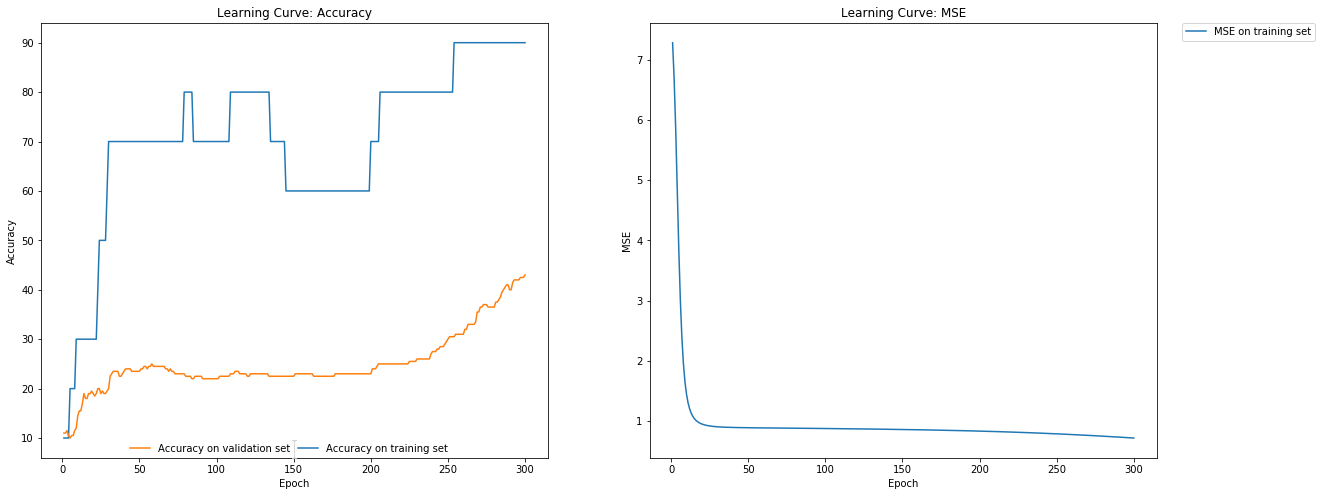

Accuracy: 41.19%
Training model with Learning Rate: 1
Training time: 1.7000834941864014


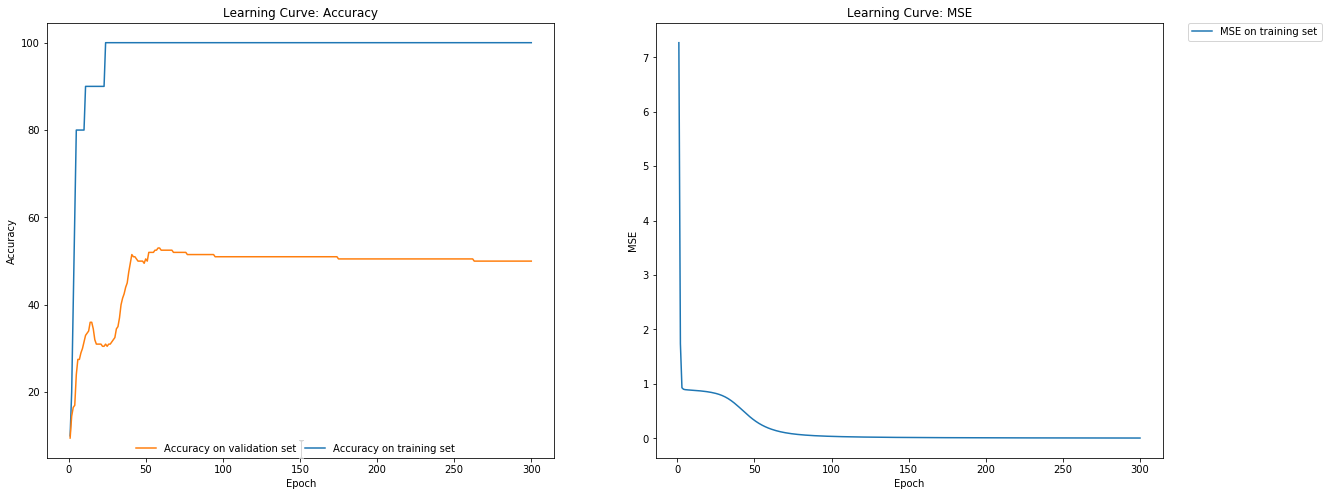

Accuracy: 51.06%
Training model with Learning Rate: 10
Training time: 1.700664758682251


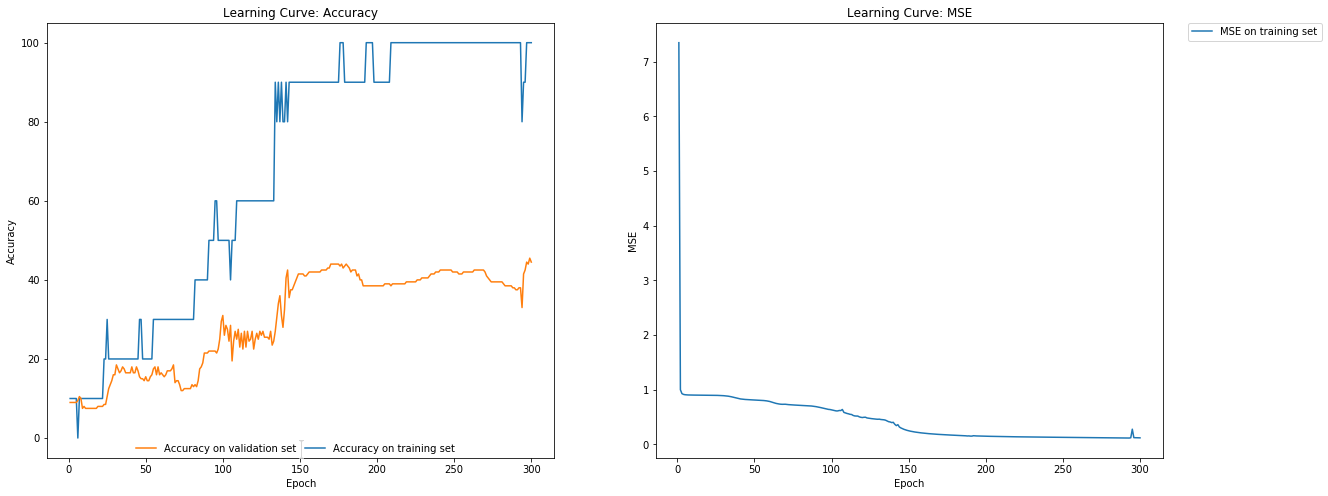

Accuracy: 38.0%


In [19]:
# 75 hidden neurons
# Define your neural network
mnist_model = NeuralNetwork(input_layer_size=784, 
                      hidden_layer_size=75, 
                      output_layer_size=10, 
                      transfer_f=sigmoid, 
                      transfer_df=dsigmoid)

# Train NN and print accuracy on test data
n_iterations = 300

for lr in [0.1, 1, 10]:
    print('Training model with Learning Rate: {}'.format(lr))
    mnist_model.train(vsmall_training_data, small_validation_data, iterations=n_iterations, learning_rate =lr)
    # Compute accuracy
    acc = mnist_model.predict(test_data) / 100
    print('Accuracy: {}%'.format(acc))
    
    # Reinitialize model weights
    mnist_model.weights_init()

<div class="alert alert-success">

COMMENT : <br />
We notice that for some models there's overfitting. Indeed, the accuracy on the training set tends to 100% whereas the accuracy of the validation set is low. Nearly all combinations are concerned.
</div>

<b>Question 2.1.5</b>: Explain the results you obtained at Questions 2.1.2, 2.1.3 and 2.1.4.

<div class="alert alert-success">

COMMENT ON 2.1.1 and 2.1.2: <br />
<table style="border-collapse: collapse;border: 1px solid black;" border="1">
  <tr>
  	<th></th>
  	<th colspan="3" align="center">Number of Hidden Layers</th>
  <tr>
  <tr>
    <th>Learning Rate</th>
    <th>15</th>
    <th>30</th> 
    <th>75</th>
  </tr>
  <tr>
    <th>0.1</th>
    <td align="center">19.75%</td>
    <td align="center">19.75%</td>
    <td align="center">16.36%</td>
  </tr>
  <tr>
    <th>1</th>
    <td align="center">83.47%</td>
    <td align="center">83.21%</td>
    <td align="center">83.48%</td>
  </tr>
  <tr>
    <th>10</th>
    <td align="center">10.41%</td>
    <td align="center">10.28%</td>
    <td align="center">10.05%</td>
  </tr>
</table>
First, whatever the learning rate is the highest accuracy is obtained with 75 hidden layers. Second, whatevers the number of neurons in hidden layers is, the highest accuracy is reached with a learning rate of 1.0. <br />
<br />
COMMENT ON 2.1.4: <br />
<table style="border-collapse: collapse;border: 1px solid black;" border="1">
  <tr>
  	<th></th>
  	<th colspan="3" align="center">Number of Hidden Layers</th>
  <tr>
  <tr>
    <th>Learning Rate</th>
    <th>15</th>
    <th>30</th> 
    <th>75</th>
  </tr>
  <tr>
    <th>0.1</th>
    <td align="center">9.87%</td>
    <td align="center">20.52%</td>
    <td align="center">41.19%</td>
  </tr>
  <tr>
    <th>1</th>
    <td align="center">48.55%</td>
    <td align="center">50.25%</td>
    <td align="center">51.06%</td>
  </tr>
  <tr>
    <th align="center">10</th>
    <td align="center">11.65%</td>
    <td align="center">9.44%</td>
    <td align="center">38.00%</td>
  </tr>
</table>
The previous observations are still true. However, here we have a lot of overfitting when training on the very small dataset.

</div>

<b>Question 2.1.6</b>: Among all the numbers of hidden neurons and learning rates you tried in previous questions, which ones would you expect to achieve best performances on the whole dataset? Justify your answer.

<div class="alert alert-success">

Based on what we just said the values that seems to give best performances are:
<ul>
    <li> Number of Neurons in Hidden Layer chosen: 75 </li>
    <li> Learning rate chosen: 1.0 </li>
</ul>
</div>

<b>Question 2.1.7</b>: Train a model with the number of hidden neurons and the learning rate you chose in Question 2.1.6 and print its accuracy on the test set. You will use validation_data for validation. Training can be long on the whole dataset (~40 minutes): we suggest that you work on the optional part while waiting for the training to finish.

Training model with Learning Rate: 1.0
Training time: 1028.642252445221


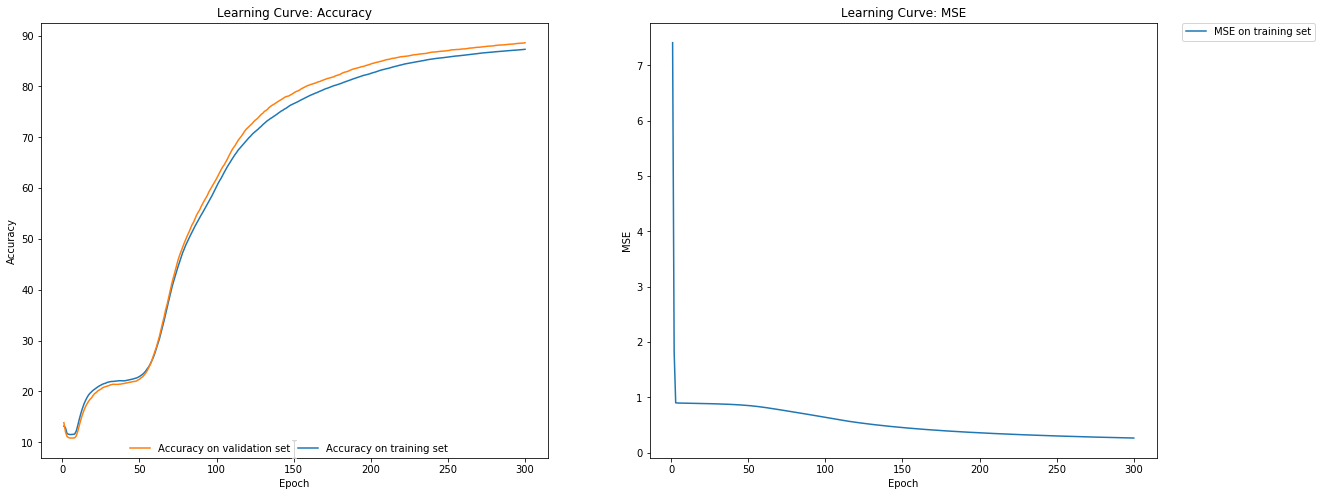

Accuracy: 88.24%


In [20]:
n_iterations = 300

mnist_model = NeuralNetwork(input_layer_size=784,
                            hidden_layer_size=75,
                            output_layer_size=10)

# Train NN and print accuracy on test data
n_iterations = 300


print('Training model with Learning Rate: {}'.format(1.0))
mnist_model.train(training_data, validation_data, iterations=n_iterations, learning_rate=1.0)

# Compute accuracy
acc = mnist_model.predict(test_data) / 100
print('Accuracy: {}%'.format(acc))
    
# Reinitialize model weights
mnist_model.weights_init()

<div class="alert alert-success">

COMMENT : <br />
The model needs a big dataset to have reliable results. That's why using all the dataset gives stisfactory accuracies.<br />
<br />
However, the model took 17 minutes to compute. This huge time of computation is to our propagate function that is using gradient descent. A good way to reduce the computation time would be to use mini batch or stochastic gradient descent.

</div>

<b>Part 2 (optional)</b>: Another loss function

In classification problems, we usually replace the sigmoids in the output layer by a "softmax" function and the MSE loss by a "cross-entropy" loss. More formally, let $u = (u_1, ..., u_n)$ be the vector representing the activation of the output layer of a Neural Network. The output of that neural network is $o = (o_1, ..., o_n) = \textrm{softmax}(u)$, and

<div align="center">$\textrm{softmax}(u) = (\frac{e^{u_1}}{\sum_{k=1}^n e^{u_k}}, ..., \frac{e^{u_n}}{\sum_{k=1}^n e^{u_k}})$.</div>

If $t = (t_1, ..., t_n)$ is a vector of non-negative targets such that $\sum_{k=1}^n t_k = 1$ (which is the case in classification problems, where one target is equal to 1 and all others are equal to 0), then the cross-entropy loss is defined as follows:

<div align="center">$L_{xe}(o, t) = - \sum_{k=1}^n t_k\log(o_k)$.</div>

<b>Question 2.2.1</b>: Let $L_{xe}$ be the cross-entropy loss function and $u_i$, $i \in \lbrace 1, ..., n \rbrace$, be the activations of the output neurons. Let us assume that the transfer function of the output neurons is the softmax function. Targets are $t_1, ..., t_n$. Derive a formula for $\frac{\partial L_{xe}}{\partial u_i}$ (details of your calculations are not required).

Answer: $\frac{\partial L_{xe}}{\partial u_i} = \frac{\partial L_{xe}}{\partial o_i} * \frac{\partial o_i}{\partial u_i} = o_i - t_i$

<b>Question 2.2.2</b>: Implement a new feedforward() function and a new backpropagate() function adapted to the cross-entropy loss instead of the MSE loss.

In [21]:
class NeuralNetwork(NeuralNetwork):
    def feedforward_xe(self, inputs):
        self.o_input = inputs
        
        # Append the bias to the input vector
        if len(inputs[0]) < self.input_layer_size:
            self.o_input = np.append(self.o_input, np.ones((len(inputs), 1)), axis=1)
        
        # Compute output for the first hidden layer
        self.u_hidden = np.dot(self.o_input, self.W_input_to_hidden)
        self.o_hidden = self.transfer_f(self.u_hidden)
        
        # Append the bias again
        if len(self.o_hidden[0]) < self.hidden_layer_size:
            self.o_hidden = np.append(self.o_hidden, np.ones((len(self.o_hidden), 1)), axis=1)
        
        # Compute network output
        self.u_output = np.dot(self.o_hidden, self.W_hidden_to_output)
        self.o_output = softmax(self.u_output)

    def backpropagate_xe(self, targets, learning_rate=5.0):
        # Compute the error derivatives w.r.t. the activation for the output 
        self.dE_du_output = self.o_output - targets
        
        # Compute the error derivatives w.r.t. the activation for the hidden layers
        # We have to append the bias and then delete the axis corresponding to the bias computation 
        self.dE_du_hidden = np.multiply(self.dE_du_output.dot(self.W_hidden_to_output.T), 
                                       np.append(self.transfer_df(self.u_hidden), 
                                                 np.ones((len(self.transfer_df(self.u_hidden)), 1)), axis=1))[:, :-1]

        # Compute the error derivatives w.r.t. the weights 
        # We have to normalize in order to visualize the accuracy later
        self.dE_dw_hidden =  (1 / len(targets)) * np.dot(self.dE_du_hidden.T, self.o_input).T
        self.dE_dw_output =  (1 / len(targets)) * np.dot(self.dE_du_output.T, self.o_hidden).T
        
        # Update weights
        self.W_hidden_to_output -= learning_rate * self.dE_dw_output
        self.W_input_to_hidden -= learning_rate * self.dE_dw_hidden

<b>Question 2.2.3</b>: Create a new Neural Network with the same architecture as in Question 2.1.1 and train it using the softmax cross-entropy loss.

Training time: 19.41732120513916


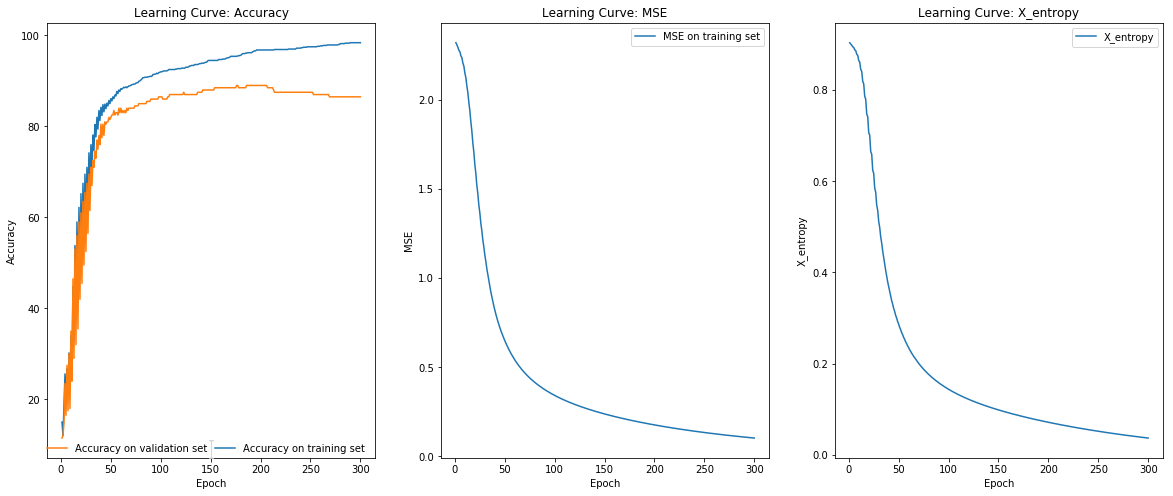

In [22]:
# Define your neural network
mnist_model_xe = NeuralNetwork(input_layer_size=784,
                               hidden_layer_size=75,
                               output_layer_size=10,
                               transfer_f=sigmoid, 
                               transfer_df=dsigmoid)

# Train NN and print accuracy on validation data
# We will use the same "good" learning rate found at question 2.1.6
mnist_model_xe.train_xe(small_training_data, small_validation_data, iterations=300, learning_rate=1.0)

In [23]:
# Compute accuracy
acc = mnist_model_xe.predict_xe(test_data) / 100
print('Obtained accuracy: {}%'.format(acc))
# Reinitialize model weights
mnist_model_xe.weights_init()

Obtained accuracy: 86.96%


Training time: 16.74053406715393


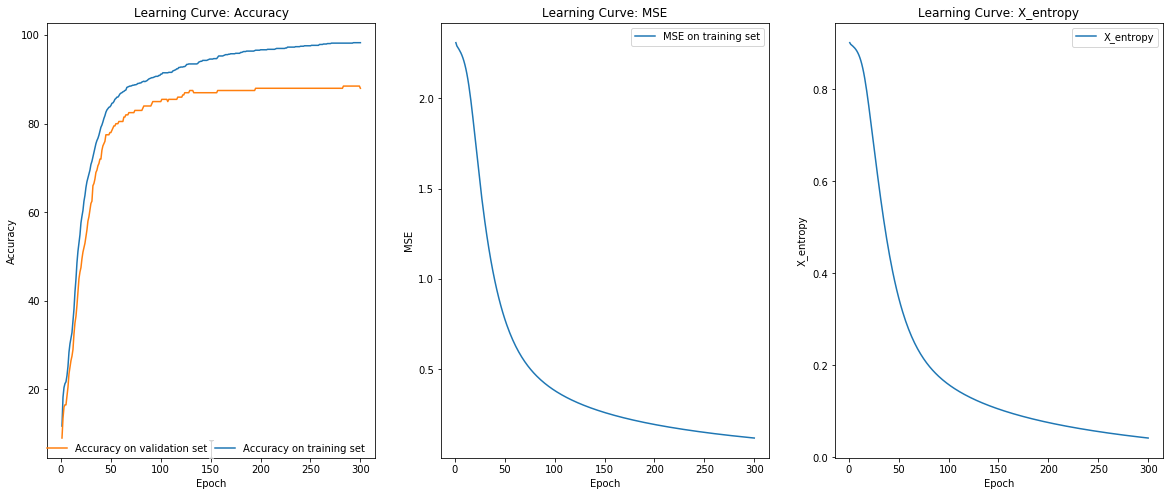

In [25]:
# Define your neural network
mnist_model_xe = NeuralNetwork(input_layer_size=784,
                               hidden_layer_size=30,
                               output_layer_size=10,
                               transfer_f=sigmoid, 
                               transfer_df=dsigmoid)

# Train NN and print accuracy on validation data
# We will use the same "good" learning rate found at question 2.1.6
mnist_model_xe.train_xe(small_training_data, small_validation_data, iterations=300, learning_rate=1.0)

In [26]:
# Compute accuracy
acc = mnist_model_xe.predict_xe(test_data) / 100
print('Obtained accuracy: {}%'.format(acc))
# Reinitialize model weights
mnist_model_xe.weights_init()

Obtained accuracy: 87.01%


<b>Question 2.2.4</b>: Compare your results with the MSE loss and with the cross-entropy loss.

<div class="alert alert-success">

COMMENT : <br />
With Cross-Entropy we get better results on both model with 75 and 30 neurons in hidden layers than the ones using MSE. We also notice that the accuracy becomes good earlier which means that we can use less iteration. That would also decrease the computation time.


</div>

<div align="center"><b>THE END!</b>